# Pytorch Computer Vision

### Computer Vision Libraries

* `torchvision` - used as a base domain library for pytorch computer vision
* `torchvision.datasets` - used for data loading functions for computer vision
* `torchvision.models` - get pretrained model that you can leverage for your own problem
* `torchvision.transforms` - function for manipulating your vision data(images) to be suitable for use of an model
* `torch.utils.data.DataSet` - Base dataset class for pytorch
* `torch.utils.data.DataLoader` - create a python iteratable over a dataset

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.2.2+cu118
0.17.2+cu118


# Getting a dataset

* Dataset that we are going to use to learn basis of torchvision is FashionMNIST dataset

In [2]:
# setting up the training data

from torchvision import datasets

train_data = torchvision.datasets.FashionMNIST(
    root = "data", # "where to download the dataset?"
    train = True, # do we want the training dataset?
    download = True, # do we need to download yes or no?
    transform = torchvision.transforms.ToTensor() , # how do we want to transform the data?
    target_transform = None # how do we want to transform the labels/target?
)

test_data = torchvision.datasets.FashionMNIST(
    root = "data", # "where to download the dataset?"
    train = False, # do we want the training dataset?
    download = True, # do we need to download yes or no?
    transform = ToTensor() , # how do we want to transform the data?
    target_transform = None # how do we want to transform the labels/target?
)

In [3]:
len(train_data) , len(test_data)

(60000, 10000)

In [4]:
image , label = train_data[0]

In [5]:
label

9

In [6]:
image.shape # channel , height , weight

torch.Size([1, 28, 28])

In [7]:
class_name = train_data.classes # this gives us the category we have in FashionMNISt dataset

In [8]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_to_idx = train_data.class_to_idx # this gives us the dictionary of class with index

In [10]:
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

# Visualizing the data

In [11]:
import matplotlib.pyplot as plt

image , label = train_data[0]
print(f"Image shape: {image.shape}")

Image shape: torch.Size([1, 28, 28])


In [12]:
# if we run plt.imshow(image) -> then it would show error it should be height * weight not chaneel * height * weight

Text(0.5, 1.0, '9')

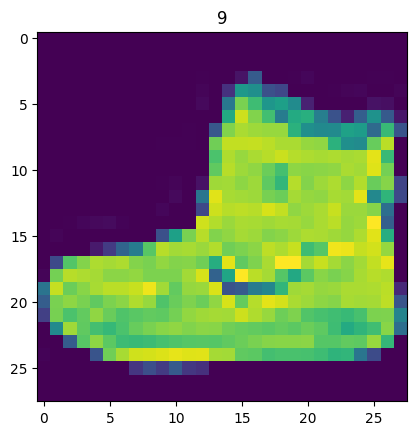

In [13]:
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

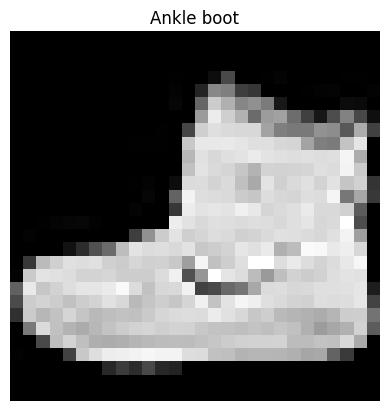

In [14]:
plt.imshow(image.squeeze() , cmap = 'gray')
plt.title(class_name[label])
plt.axis(False)

### Ploting more images

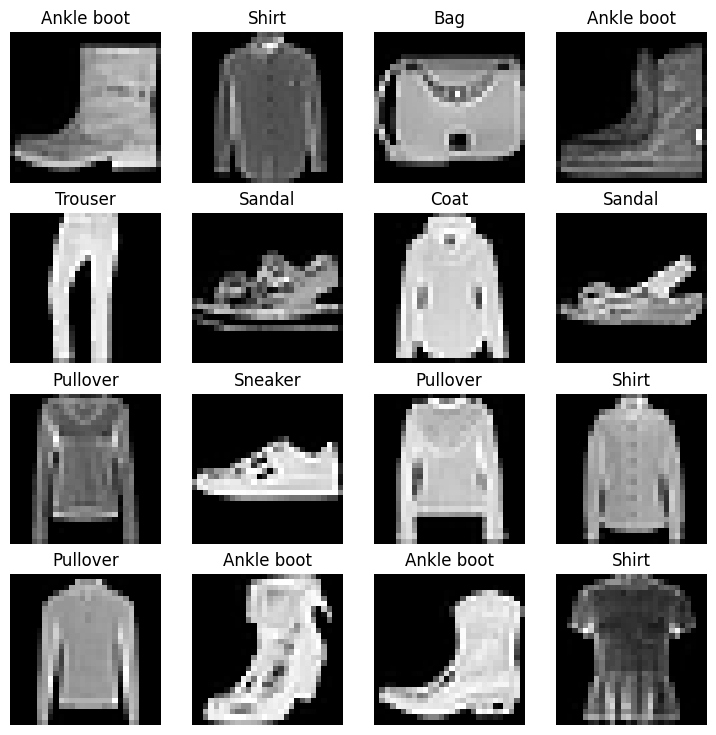

In [15]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
row , col = 4 , 4
for i in range(1 , row*col + 1):
    random_idx = torch.randint(0 , len(train_data) , size = [1]).item()
    image , label = train_data[random_idx]
    fig.add_subplot(row,col,i)
    plt.imshow(image.squeeze() , cmap='gray')
    plt.title(class_name[label])
    plt.axis(False)

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

**`Do you think items of clothing could be modelled with pure linear lines ? Or do we need non - linearity?`**

In [17]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [18]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

## Prepare DataLoader

* Right Now , our data is in the form of PyTorch Dataset
* DataLoader turn our dataset into Python Iterable
* More specifically , we want to turn our data into batches (mini - batches)
* why we would do this?
* ->  It is more computationally efficient , as in your computer hardware may not be able to look (store in memory) at 60000 images in one hit so we break it down to 32 images at a time (batch of images)
* -> It give our neural network more chance to update its gradient per epochs
* you can learn about mini - batches online references

In [19]:
!nvidia-smi

Sat Mar 30 16:54:50 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650        Off |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8              2W /   50W |     174MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [20]:
from torch.utils.data import DataLoader

In [21]:
# setup the batch size hyperparamter

BATCH_SIZE = 32

# Turn datasets into iterable (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size = BATCH_SIZE,
                              shuffle = False)

In [22]:
print(f"DataLoaders : {train_dataloader , test_dataloader}")

DataLoaders : (<torch.utils.data.dataloader.DataLoader object at 0x702f776db400>, <torch.utils.data.dataloader.DataLoader object at 0x702f776d80a0>)


In [23]:
print(f"Length of the train_dataloader:{len(train_dataloader)} batch of {BATCH_SIZE}")
print(f"Length of the test_dataloader:{len(test_dataloader)} batch of {BATCH_SIZE}")

Length of the train_dataloader:1875 batch of 32
Length of the test_dataloader:313 batch of 32


In [24]:
# check out what's inside the train dataloader

train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
Label : 8 , label size : torch.Size([])


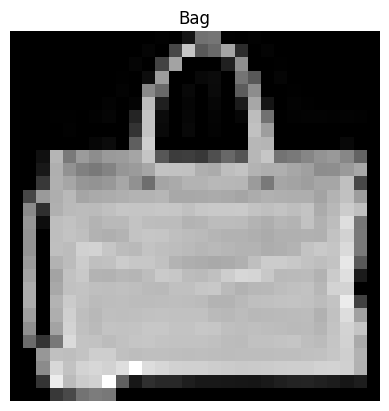

In [25]:
# show a sample

# torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size = [1]).item()
img , label = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(img.squeeze() , cmap="gray")
plt.title(class_name[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"Label : {label} , label size : {label.shape}")

## Building the models -> model_0 : base line model

* when starting to build a series of machine learning modelling experiments , it's best practise to start with the base line model
* A base line model is a simple model you will try and improve upon with subsequent model/experiment

In [26]:
# creating a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]

# lest flatten the x
output = flatten_model(x)

print(f"shape before flattening:{x.shape} -> [color channels , height , width]")
print(f"shape after flattening:{output.shape} -> [color channels , height*width ]")

shape before flattening:torch.Size([1, 28, 28]) -> [color channels , height , width]
shape after flattening:torch.Size([1, 784]) -> [color channels , height*width ]


In [27]:
from torch import nn
class FashionMNISTModel(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_shape)
        )

    def forward(self,x):
        return self.layer_stack(x)

In [28]:
torch.manual_seed(42)

# setup the model input parameters
model_0 = FashionMNISTModel(
    input_shape=784,
    hidden_units = 256,
    output_shape = len(class_name)
).to('cpu')

In [29]:
(model_0.state_dict)

<bound method Module.state_dict of FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=10, bias=True)
  )
)>

In [30]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.1632,  0.1134, -0.0667,  0.3176,  0.0384, -0.0599,  0.1459, -0.1255,
          0.1022,  0.2317]], grad_fn=<AddmmBackward0>)

### Setting up the loss and optimizer function

* Loss function - since we're working with multiclass data , our loss function will be `nn.CrossEntropy`
* Optimizer - our optimizer `torch.optim.SGD()`
* Evaluation Metric - since we're working on a classification problem , let use accuracy as our evaluation metric

In [31]:
def accuracy(y_true , y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [32]:
import requests
from pathlib import Path

# Downloading the helper function form learn pytorch repo
if Path("helper_functions.py").is_file():
    print(f"helper_fucntion already exist")
else:
    print("Downloading the helper function")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_fucntion already exist


In [33]:
# Importing the accuray metrics from helper_function.py
from helper_functions import accuracy_fn

In [34]:
# setting up the loss and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters() , lr = 0.1)

## Creating a function to time our experiments

Machine learning is very much experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values)
2. How fast it runs 

In [35]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device=None):
    '''print difference between start and end time'''
    total_time = end - start
    print(f"Train time on {device} : {total_time:.3f} seconds")
    return total_time

In [36]:
start_time = timer()
# some code
end_time = timer()

print_train_time(start_time , end_time , device = 'cpu')

Train time on cpu : 0.000 seconds


2.3326996597461402e-05

## Creating training loop and training a model on batches on data

* Loop through epochs
* Loop through training batches , perform training steps , calculate the train loss **per batches**
* Loop through testing batches , perform testingg steps , calculate the test loss **per batches**
* print out what's happening

In [37]:
import torch
from tqdm.auto import tqdm
from timeit import default_timer as timer

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the no of epochs (we will keep this smaller for faster training time)
epochs = 3

# create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epochs : {epoch} \n")

    train_loss = 0
    model_0.train()  # set the model to training mode
    # Add a loop to loop through the training batches
    for batch, (image, label) in enumerate(train_dataloader):
        # Forward pass
        label_pred = model_0(image)
        # calculate loss (per batches)
        loss = loss_fn(label_pred, label)
        train_loss += loss.item()  # accumulate the loss
        # optimizer zero grad
        optimizer.zero_grad()
        # loss backward
        loss.backward()
        # optimizer step
        optimizer.step()
        if batch % 400 == 0:
            print(f"Looked at {batch * len(image)} / {len(train_dataloader.dataset)} samples.")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    # testing
    test_loss, test_acc = 0, 0
    model_0.eval()  # set the model to evaluation mode
    with torch.no_grad():  # turn off gradient tracking for inference
        for image, label in test_dataloader:
            # forward pass
            label_test_pred = model_0(image)
            # loss
            test_loss += loss_fn(label_test_pred, label).item()  # accumulate the loss
            # accuracy
            test_acc += accuracy_fn(label, label_test_pred.argmax(dim=1))  # accumulate the accuracy

        # calculate the test loss average per batches
        test_loss /= len(test_dataloader)
        # calculate the test acc average per batches
        test_acc /= len(test_dataloader)

    print(f"Train Loss:{train_loss:.4f} | Test Loss:{test_loss:.4f} | Test Acc:{test_acc:.4f}")

# calculating the time
train_time_end_on_cpu = timer()

total_train_time_model_0 = train_time_end_on_cpu - train_time_start_on_cpu
print(f"Total training time: {total_train_time_model_0:.2f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs : 0 

Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train Loss:0.5748 | Test Loss:0.5027 | Test Acc:82.5180
Epochs : 1 

Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train Loss:0.4739 | Test Loss:0.4838 | Test Acc:82.8574
Epochs : 2 

Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train Loss:0.4539 | Test Loss:0.4763 | Test Acc:83.5064
Total training time: 17.52 seconds


## Make Prediction and get Mode 0  result

In [72]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions with the model
            y_pred = model(X)
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [39]:
device

'cuda'

## Model 1 : Building a better model with non-linearity

In [40]:
class FashionMnistModelV1(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
                        nn.Flatten(),
                        nn.Linear(input_shape,hidden_units),
                        nn.ReLU(),
                        nn.Linear(hidden_units,output_shape),
                        nn.ReLU())
    def forward(self,x:torch.Tensor):
        return self.layer_stack(x)

In [41]:
next(model_0.parameters()).device

device(type='cpu')

In [63]:
# create a instate of model 1
torch.manual_seed(42)
model_1 = FashionMnistModelV1(784,10,len(class_name)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [64]:
# setting up the loss and optimizer for model1

In [65]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),0.01)

In [66]:
# Functionizing training and evaluation/testing loop

In [67]:
def train_loop_function(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(dataloader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [68]:
def test_loop_function(dataloader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in dataloader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [69]:
torch.manual_seed(42)

# Measure time
import time
train_time_start_gpu = time.time()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}")
    train_loop_function(model = model_1,
                        dataloader = train_dataloader,
                        loss_fn = loss_fn,
                        optimizer = optimizer,
                        accuracy_fn = accuracy_fn,
                        device = device)
    test_loop_function(model = model_1,
                       dataloader = test_dataloader,
                       loss_fn = loss_fn,
                       accuracy_fn = accuracy_fn,
                       device = device)

train_time_end_gpu = time.time()
total_train_time_model_1 = print_train_time(train_time_start_gpu,train_time_end_gpu,device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
Train loss: 0.77872 | Train accuracy: 72.19%
Test loss: 0.72671 | Test accuracy: 74.80%

Epoch : 1
Train loss: 0.69171 | Train accuracy: 74.85%
Test loss: 0.74682 | Test accuracy: 72.90%

Epoch : 2
Train loss: 0.66968 | Train accuracy: 75.67%
Test loss: 0.70321 | Test accuracy: 74.17%

Train time on cuda : 19.387 seconds


In [70]:
model_0_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.47632458806037903,
 'model_acc': 83.50638977635782}

In [71]:
total_train_time_model_0

17.520338546994026

**Note** : sometime , depending on your data/hardware you might find that your model train faster on cpu than gpu?
* why is this?
 > 1. It could be that the overhead for copying data/model to and from the gpu outweight the compute benefit offered by gpu
 > 2. The hardware you're using has better cpu in terms of gpu

In [73]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn,
               device = device):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X , y = X.to(device) , y.to(device)
            # Make predictions with the model
            y_pred = model(X)
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [75]:
model_1_result = eval_model(model = model_1,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn,
                            device = device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [76]:
model_1_result

{'model_name': 'FashionMnistModelV1',
 'model_loss': 0.703208327293396,
 'model_acc': 74.17132587859425}

## Model 2 : Building a convolutional neural networks (CNN) aslo know as convnets

* `Resource Link` - https://poloclub.github.io/cnn-explainer/

In [149]:
# we are going to make convolution neural network
class FashionMnistModelV2(nn.Module):
    '''
    Model we are replicating is the tinyvgg from the resource link above
    '''
    def __init__(self , input_shape : int , hidden_units : int , output_shape : int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
                            nn.Conv2d(in_channels=input_shape,
                                      out_channels=hidden_units,
                                      kernel_size=3,
                                      stride=1,
                                      padding=1),
                            nn.ReLU(),
                            nn.Conv2d(in_channels=hidden_units,
                                      out_channels=hidden_units,
                                      kernel_size=3,
                                      stride=1,
                                      padding=1),
                            nn.ReLU(),
                            nn.AvgPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
                            nn.Conv2d(in_channels=hidden_units,
                                      out_channels=hidden_units,
                                      kernel_size=3,
                                      stride=1,
                                      padding=1),
                            nn.ReLU(),
                            nn.Conv2d(in_channels=hidden_units,
                                      out_channels=hidden_units,
                                      kernel_size=3,
                                      stride=1,
                                      padding=1),
                            nn.ReLU(),
                            nn.AvgPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=(hidden_units*7*7),out_features=output_shape) # there is trick to calculate this
        )

    def forward(self,x):
        x = self.conv_block_1(x)
        # print("Output shape of conv_block_1:",x.shape)
        x = self.conv_block_2(x)
        # print("Output shape of conv_block_2:",x.shape)
        x = self.classifier(x)
        # print("Output shape of Classifier:",x.shape)
        return x

In [150]:
torch.manual_seed(42)
model_2 = FashionMnistModelV2(input_shape=1, # because we have 1 color channel
                              hidden_units=10,
                              output_shape=len(class_name)).to(device)

In [151]:
rand_image_tensor = torch.randn([1,28,28])
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [152]:
model_2(image[0].unsqueeze(0).to(device))

tensor([[ 0.0332, -0.0603,  0.0450, -0.0305, -0.0132,  0.0145, -0.0028, -0.0120,
          0.0293,  0.0111]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [153]:
## Setup a loss function and optimizer for model_2
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters() , lr = 0.01)

## Training and testing the cnn model

In [155]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure the time
import time
train_cnn_start = time.time()

# train and test model
epoch = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}")
    train_loop_function(model_2,
                        train_dataloader,
                        loss_fn,
                        optimizer,
                        accuracy_fn,
                        device)
    test_loop_function( test_dataloader,model_2,loss_fn,accuracy_fn,device)
train_cnn_end = time.time()
total_train_time_cnn = print_train_time(train_cnn_start , train_cnn_end , device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
Train loss: 0.45473 | Train accuracy: 83.81%
Test loss: 0.44653 | Test accuracy: 84.48%

Epoch : 1
Train loss: 0.42447 | Train accuracy: 84.80%
Test loss: 0.42224 | Test accuracy: 85.04%

Epoch : 2
Train loss: 0.40153 | Train accuracy: 85.67%
Test loss: 0.40277 | Test accuracy: 85.87%

Train time on cuda : 21.874 seconds


In [156]:
model_2_result = eval_model(model_2,test_dataloader,loss_fn,accuracy_fn,device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [158]:
model_0_results,model_1_result,model_2_result

({'model_name': 'FashionMNISTModel',
  'model_loss': 0.47632458806037903,
  'model_acc': 83.50638977635782},
 {'model_name': 'FashionMnistModelV1',
  'model_loss': 0.703208327293396,
  'model_acc': 74.17132587859425},
 {'model_name': 'FashionMnistModelV2',
  'model_loss': 0.40276703238487244,
  'model_acc': 85.87260383386581})

# Compare Model result and training time

In [163]:
import pandas as pd

In [164]:
compare_results = pd.DataFrame([model_0_results,model_1_result,model_2_result])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModel,0.476325,83.506390
1,FashionMnistModelV1,0.703208,74.171326
2,FashionMnistModelV2,0.402767,85.872604


### Stepping through `nn.Conv2D`

In [87]:
torch.manual_seed(42)

# create a batch of images
images = torch.randn([32,3,64,64])
test_image = images[0]

print(f"Image batch shape : {images.shape}")
print(f"Single image shape : {test_image.shape}")
print(f"Test image : {test_image}")

Image batch shape : torch.Size([32, 3, 64, 64])
Single image shape : torch.Size([3, 64, 64])
Test image : tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[

In [105]:
torch.manual_seed(42)
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, # color channel
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1)
# passing the data through conv layer
conv_ouput = conv_layer(test_image)

In [106]:
conv_ouput.shape

torch.Size([10, 64, 64])

### Stepping through nn.MaxPool2dm

In [107]:
test_image.shape

torch.Size([3, 64, 64])

In [112]:
# print out original image shape without unsqueezed dimensioin
print(f"Test image original shape : {test_image.shape}")
print(f"Test image with unsqueezed dimension : {test_image.unsqueeze(0).shape}")

# create a sample nn.MaxPool2dd layer 
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through conv layer 
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv layer(): {test_image_through_conv.shape}")

test_image_passing_through_max_layer = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_passing_through_max_layer.shape}") 

Test image original shape : torch.Size([3, 64, 64])
Test image with unsqueezed dimension : torch.Size([1, 3, 64, 64])
Shape after going through conv layer(): torch.Size([10, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([10, 32, 32])


In [113]:
torch.manual_seed(42)
# create a random tensor with a similar number of dimension to our images
random_tensor = torch.randn(size = [1,1,2,2])
print(f"\n Random Tensor : \n {random_tensor}")
print(f"\n Random Tensor shape : {random_tensor.shape}")
# create max_pool_layer 
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# passing the random tensor throught the max_pool_layers
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\n Max Pool Tensor : \n {max_pool_tensor}")
print(f"\n Max Pool Tensor shape : {max_pool_tensor.shape}")


 Random Tensor : 
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

 Random Tensor shape : torch.Size([1, 1, 2, 2])

 Max Pool Tensor : 
 tensor([[[[0.3367]]]])

 Max Pool Tensor shape : torch.Size([1, 1, 1, 1])


In [115]:
# now passing max_pool_tensor to flatten layer see what happens
flatten_layer = nn.Flatten()
output_tensor = flatten_layer(max_pool_tensor)

print(f"\n Max Pool Tensor : \n {max_pool_tensor}")
print(f"\n Max Pool Tensor shape : {max_pool_tensor.shape}")

print(f"\n Flatten Tensor : \n {output_tensor}")
print(f"\n Flatten Tensor shape : {output_tensor.shape}")


 Max Pool Tensor : 
 tensor([[[[0.3367]]]])

 Max Pool Tensor shape : torch.Size([1, 1, 1, 1])

 Flatten Tensor : 
 tensor([[0.3367]])

 Flatten Tensor shape : torch.Size([1, 1])


In [116]:
'''Summary we give original images to convulution layer then we pass to max_pooling layer -> this compress the 
image based on the kernel size and then we can flatten the max_pool_tensor and then pass it to linear layer'''

'Summary we give original images to convulution layer then we pass to max_pooling layer -> this compress the \nimage based on the kernel size and then we can flatten the max_pool_tensor and then pass it to linear layer'

In [119]:
image

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

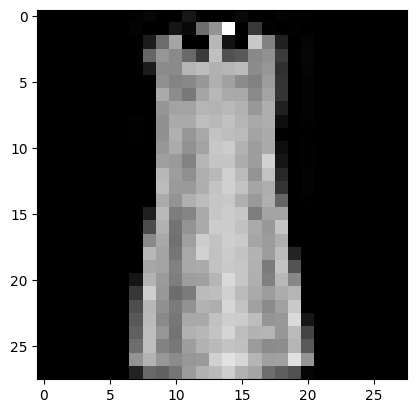

In [125]:
plt.imshow(image[0].squeeze(),cmap = 'gray')